In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("/content/Employee.csv")

**# Data Exploration**

1.Explore the data, list down the unique values in each feature and find its length.

2.Perform the statistical analysis and renaming of the columns.


In [14]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())


Dataset shape: (148, 6)

First 5 rows of the dataset:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [15]:
print("\nData types:")
print(df.dtypes)



Data types:
Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object


Summary statistics for numerical columns

In [16]:
print("\nSummary statistics for numerical columns:")
print(df.describe())



Summary statistics for numerical columns:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [17]:
print("\nUnique values in each column:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")
    print("-" * 50)


Unique values in each column:
Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values: 7
--------------------------------------------------
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values: 30
--------------------------------------------------
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values: 41
--------------------------------------------------
Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values: 12
--------------------------------------------------
Country: ['India']
Number of unique values: 1
-----

 Rename columns for better readability

In [18]:
print("Current column names:")
print(df.columns.tolist())

Current column names:
['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender']


# **# Data Cleaning**



1.Find the missing and inappropriate values, treat them appropriately.

2.Remove all duplicate rows.

3.Find the outliers.

4.Replace the value 0 in age as NaN

5.Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

# Missing values in each column

In [19]:
print(df.isnull().sum())

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


# Checking for inappropriate values

In [20]:
for column in df.columns:
    if df[column].dtype == 'object':
        # For categorical columns, check unique values
        print(f"Unique values in {column}: {df[column].unique()}")
    else:
        # For numerical columns, check range
        print(f"Range of {column}: {df[column].min()} to {df[column].max()}")


Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Range of Age: 0.0 to 54.0
Range of Salary: 1089.0 to 9876.0
Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Unique values in Country: ['India']
Range of Gender: 0 to 1


# Remove duplicate rows

In [21]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_count} duplicate rows. New shape: {df.shape}")


Number of duplicate rows: 4
Removed 4 duplicate rows. New shape: (144, 6)


# Find outliers using IQR method for numerical columns

In [22]:
print("\nFinding outliers using IQR method...")
numerical_cols = df.select_dtypes(include=[np.number]).columns

for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Column '{column}' has {len(outliers)} outliers")
    print(f"Range for outliers: < {lower_bound} or > {upper_bound}")



Finding outliers using IQR method...
Column 'Age' has 0 outliers
Range for outliers: < -1.25 or > 60.75
Column 'Salary' has 0 outliers
Range for outliers: < -4425.0 or > 15455.0
Column 'Gender' has 32 outliers
Range for outliers: < 0.0 or > 0.0


# Plotting boxplot to visualize outliers

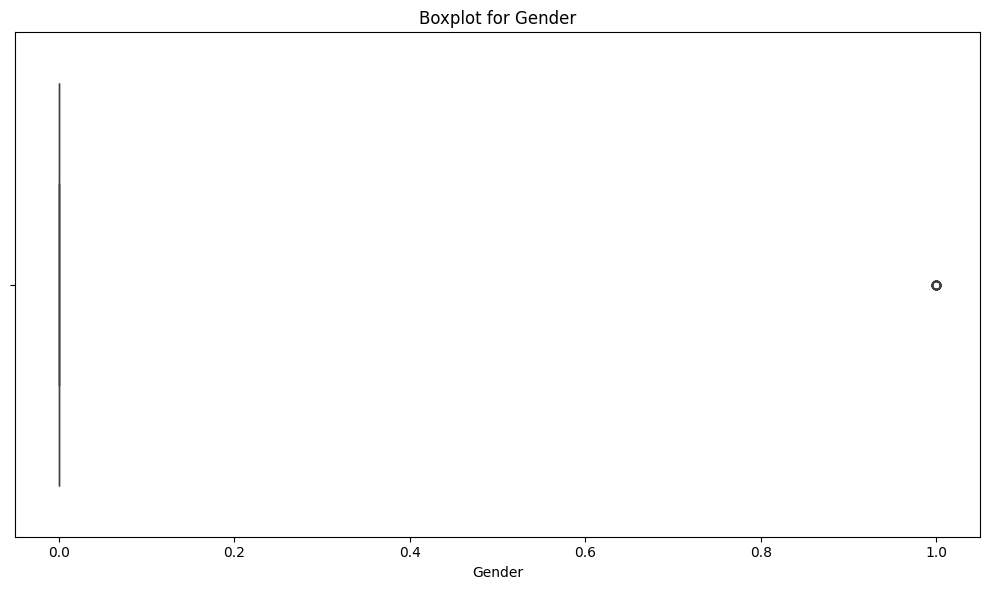

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

# Replace 0 in age column with NaN

In [24]:
if 'Age' in df.columns:
    zero_ages = df['Age'] == 0
    print(f"\nNumber of zero values in Age column: {sum(zero_ages)}")
    df.loc[zero_ages, 'Age'] = np.nan
    print("Replaced zeros in Age column with NaN")
elif 'age' in df.columns:
    zero_ages = df['age'] == 0
    print(f"\nNumber of zero values in age column: {sum(zero_ages)}")
    df.loc[zero_ages, 'age'] = np.nan
    print("Replaced zeros in age column with NaN")
else:
    print("\nNo 'Age' or 'age' column found in the dataset")


Number of zero values in Age column: 6
Replaced zeros in Age column with NaN


# Check for missing values after replacing zeros with NaN

In [25]:
print("\nMissing values after replacing zeros with NaN:")
print(df.isnull().sum())



Missing values after replacing zeros with NaN:
Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64


# Treat null values in all columns

In [26]:
print("\nTreating null values in all columns...")
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 0:
        if df[column].dtype == 'object':
            # For categorical columns, use mode
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
            print(f"Filled {null_count} nulls in {column} with mode: {mode_value}")
        else:
            # For numerical columns, use median
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
            print(f"Filled {null_count} nulls in {column} with median: {median_value}")



Treating null values in all columns...
Filled 8 nulls in Company with mode: TCS
Filled 23 nulls in Age with median: 33.0
Filled 23 nulls in Salary with median: 5000.0
Filled 14 nulls in Place with mode: Mumbai


# Verify no missing values remain

In [27]:
print("\nMissing values after treatment:")
print(df.isnull().sum())



Missing values after treatment:
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


# **#Data Analysis**

 1.Filter data with age > 40 and salary < 5000

 2.Plot the chart with age and salary

 3.Count the number of people from each place and represent it visually

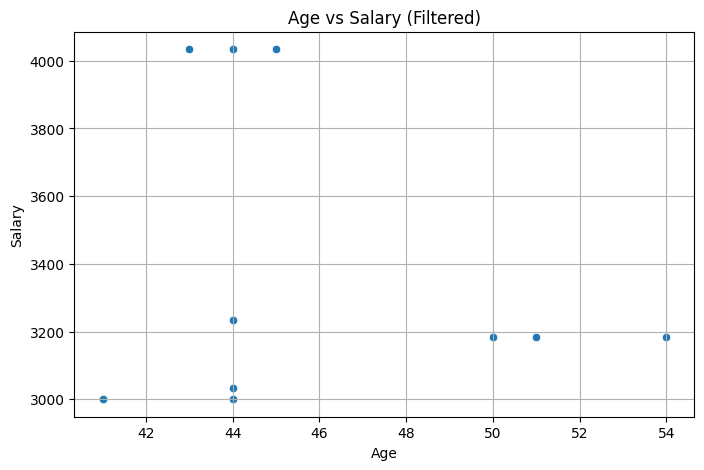

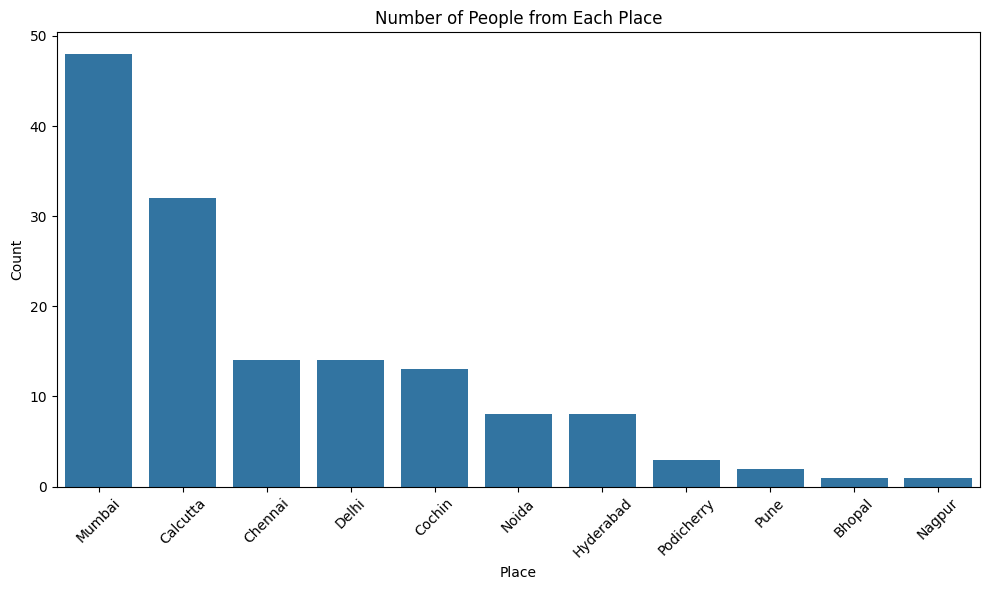

In [35]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
# Plot Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='Age', y='Salary')
plt.title('Age vs Salary (Filtered)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Count people from each place
place_counts = df['Place'].value_counts()

# Plot people count per place
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **#Data Encoding**

Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [36]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding
label_encoded_df = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    label_encoded_df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Apply One-Hot Encoding
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# **#Feature Scaling**

After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [37]:
# Identify numerical columns for scaling (excluding any target variables)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# StandardScaler
std_scaler = StandardScaler()
std_scaled_data = std_scaler.fit_transform(df[numerical_cols])
std_scaled_df = pd.DataFrame(std_scaled_data, columns=numerical_cols)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(df[numerical_cols])
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=numerical_cols)

# Display results
print("\nOriginal Data:")
print(df[numerical_cols].describe())

print("\nStandardScaled Data:")
print(std_scaled_df.describe())

print("\nMinMaxScaled Data:")
print(minmax_scaled_df.describe())


Original Data:
              Age       Salary      Gender
count  144.000000   144.000000  144.000000
mean    32.194444  5238.194444    0.222222
std      8.242206  2370.641804    0.417191
min     17.000000  1089.000000    0.000000
25%     23.750000  3045.000000    0.000000
50%     33.000000  5000.000000    0.000000
75%     36.000000  7084.000000    0.000000
max     54.000000  9876.000000    1.000000

StandardScaled Data:
                Age        Salary        Gender
count  1.440000e+02  1.440000e+02  1.440000e+02
mean   2.073958e-16  4.625929e-17  6.167906e-17
std    1.003490e+00  1.003490e+00  1.003490e+00
min   -1.849927e+00 -1.756350e+00 -5.345225e-01
25%   -1.028113e+00 -9.283771e-01 -5.345225e-01
50%    9.807657e-02 -1.008275e-01 -5.345225e-01
75%    4.633273e-01  7.813277e-01 -5.345225e-01
max    2.654831e+00  1.963179e+00  1.870829e+00

MinMaxScaled Data:
              Age      Salary      Gender
count  144.000000  144.000000  144.000000
mean     0.410661    0.472197    0.2222